In [61]:
import pandas as pd
import numpy as np
import scipy
import pylab as pl
import sklearn as sk
import seaborn as sns
%matplotlib inline

In [368]:
data = pd.read_excel('HealthViz County Dataset 6.19.17.xlsx',skiprows=0, header=1, index_col=0)
data.index.name=None

In [369]:
data.shape

(3220, 41)

In [372]:
data.columns

var = data['Dual eligible coverage (% of residents), 2010-2014']

In [5]:

def cov(x,y,w=None):
    '''
    Calculates covariance of x,y weighted by w.
    Parameters
        x,y: pd.Series
        w: pd.Series or None
    Returns
        covariance: float
    '''
    if w is None:
        w = pd.Series(np.ones(x.shape[0]))
        w.index = x.index
        
    numerator = sum(w*(x - np.average(x, weights=w))*(y - np.average(y, weights=w)))
    denominator = sum(w)
    return numerator/denominator

def corr(x, y, w=None, check_nulls = False):
    '''
    Calculates Pearson correlation between x,y weighted by w.
    Parameters
        x,y: pd.Series
        w: pd.Series or None
        check_nulls: Boolean, optional 
    Returns
        covariance: float
    '''
    if w is None:
        w = pd.Series(np.ones(x.shape[0]))
        w.index = x.index
    
    if check_nulls:
        df = pd.concat([x, y, w], axis = 1)
        null_cols  = df.isnull().any(axis = 1)
    
        if null_cols.any():
            x = x[~null_cols]
            y = y[~null_cols]
            w = w[~null_cols]

    return cov(x,y,w)/np.sqrt(cov(x,x,w)*cov(y,y,w))



In [32]:
def df_corr(xs, ys, w=None, method=corr, min_periods=1):
        """
        Compute pairwise correlation of columns, excluding NA/null values
        Parameters
        ----------
        min_periods : int, optional
            Minimum number of observations required per pair of columns
            to have a valid result. 
        Returns
        -------
        y : DataFrame
        
        Modified from pandas:
            https://github.com/pandas-dev/pandas/blob/v0.20.2/pandas/core/frame.py#L4817-L4871
        """
        if isinstance(xs, pd.Series):
            xs = pd.DataFrame(xs)
            
        rows = xs.columns
       
        if isinstance(ys, pd.Series):
            ys = pd.DataFrame(ys)
            
        cols = ys.columns
            
        xmat = xs.values.T
        ymat = ys.values.T

        if min_periods is None:
            min_periods = 1
        #mat = _ensure_float64(mat).T
        corrf = method
        K = len(rows)
        M = len(cols)
        correl = np.empty((K, M), dtype=float)
        xmask = np.isfinite(xmat)
        ymask = np.isfinite(ymat)
        for i, ac in enumerate(xmat):
            for j, bc in enumerate(ymat):
                valid = xmask[i] & ymask[j]
                
                if valid.sum() < min_periods:
                    c = NA
                elif not valid.all():
                    c = corrf(ac[valid], bc[valid], w[valid])
                else:
                    c = corrf(ac, bc, w)
                correl[i, j] = c

        return pd.DataFrame(correl, index=rows, columns=cols)

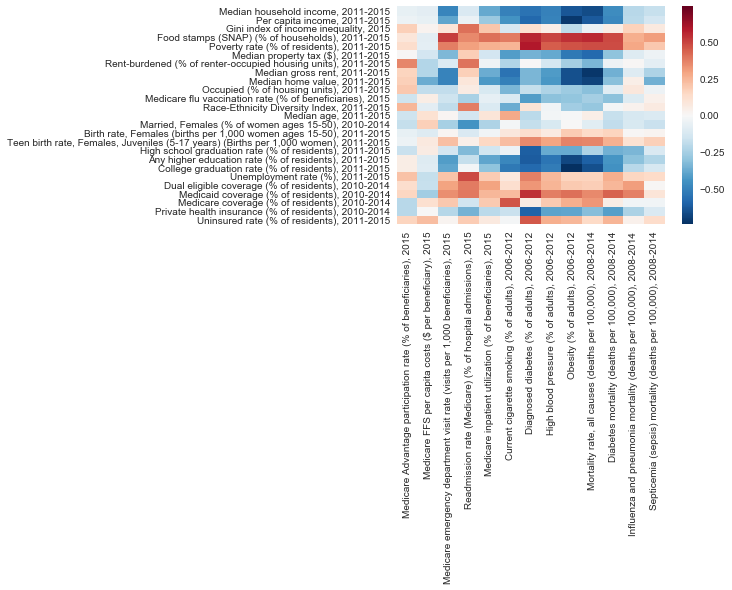

In [169]:
w = data.ix[:,1]
xs = data.ix[:,2:27]
ys = data.ix[:,27:-1]
crs = df_corr(xs,ys,w)
sns.heatmap(crs)

In [170]:
crs

,"Medicare Advantage participation rate (% of beneficiaries), 2015","Medicare FFS per capita costs ($ per beneficiary), 2015","Medicare emergency department visit rate (visits per 1,000 beneficiaries), 2015","Readmission rate (Medicare) (% of hospital admissions), 2015","Medicare inpatient utilization (% of beneficiaries), 2015","Current cigarette smoking (% of adults), 2006-2012","Diagnosed diabetes (% of adults), 2006-2012","High blood pressure (% of adults), 2006-2012","Obesity (% of adults), 2006-2012","Mortality rate, all causes (deaths per 100,000), 2008-2014","Diabetes mortality (deaths per 100,000), 2008-2014","Influenza and pneumonia mortality (deaths per 100,000), 2008-2014","Septicemia (sepsis) mortality (deaths per 100,000), 2008-2014"
"Median household income, 2011-2015",-0.063581,-0.078551,-0.488691,-0.113363,-0.379721,-0.503416,-0.546032,-0.499706,-0.634078,-0.664253,-0.464039,-0.206504,-0.168147
"Per capita income, 2011-2015",-0.043993,-0.059137,-0.391643,-0.050106,-0.277413,-0.441639,-0.583678,-0.497832,-0.714107,-0.623472,-0.478021,-0.201713,-0.135658
"Gini index of income inequality, 2015",0.176471,0.027880,0.094896,0.410381,0.206067,-0.124187,0.121395,0.051298,-0.195172,-0.049095,0.055589,0.168864,0.075316
"Food stamps (SNAP) (% of households), 2011-2015",0.090918,-0.079888,0.513043,0.354434,0.408423,0.385150,0.562364,0.500838,0.544174,0.558794,0.488769,0.270977,0.311705
"Poverty rate (% of residents), 2011-2015",0.133020,-0.070911,0.382318,0.302886,0.265188,0.254274,0.593456,0.450696,0.473008,0.481717,0.481312,0.289662,0.201975
"Median property tax ($), 2011-2015",0.006515,-0.137083,-0.335303,0.180412,-0.133325,-0.416195,-0.352521,-0.379809,-0.529035,-0.575380,-0.299804,-0.095771,-0.037578
"Rent-burdened (% of renter-occupied housing units), 2011-2015",0.362285,-0.217213,-0.106719,0.403068,-0.031934,-0.223791,0.004210,-0.132136,-0.253572,-0.340989,-0.035887,0.007097,-0.073728
"Median gross rent, 2011-2015",0.162855,-0.216222,-0.495552,0.174236,-0.370514,-0.545749,-0.338240,-0.420302,-0.650573,-0.720465,-0.359218,-0.098495,-0.228980
"Median home value, 2011-2015",0.176202,-0.367853,-0.495343,0.087802,-0.425724,-0.509472,-0.341804,-0.433022,-0.652575,-0.685987,-0.310440,0.050310,-0.357029
"Occupied (% of housing units), 2011-2015",0.200241,-0.183135,-0.181269,0.062724,-0.115936,-0.340733,-0.178317,-0.229821,-0.269347,-0.309640,-0.088177,0.084008,-0.039978


In [59]:
def ordered_corrs(xs, y, w):
    '''
    '''
    crs = df_corr(xs,y,w)
    return crs.reindex(crs.ix[:,0].abs().sort_values(ascending=False).index).ix[:,0]

def ordered_heatmap(crs):
    pl.figure()
    sns.heatmap(pd.DataFrame(crs), vmin = -.8, vmax = .8)
    pl.show()

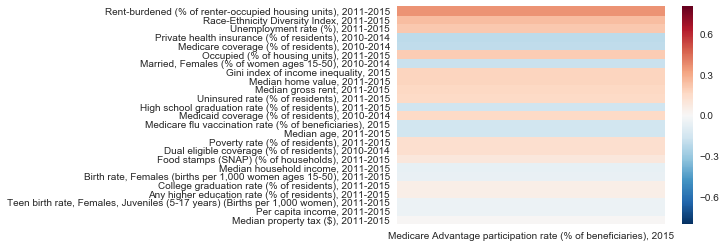

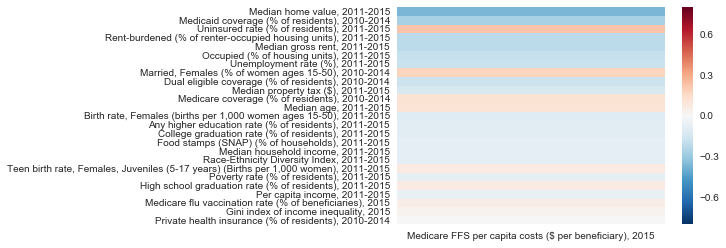

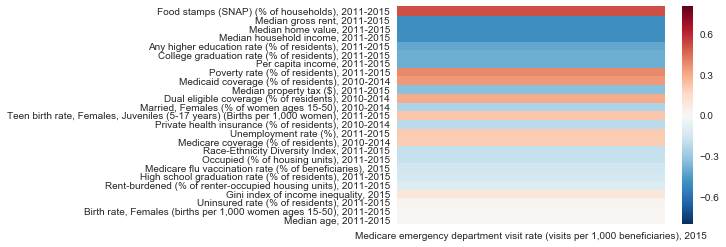

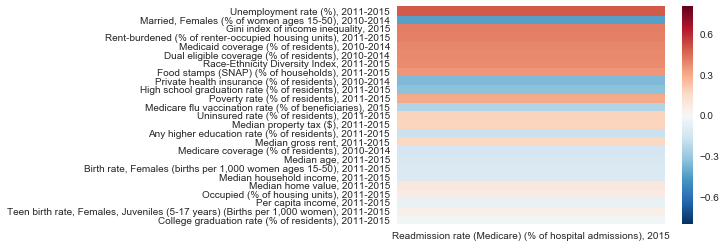

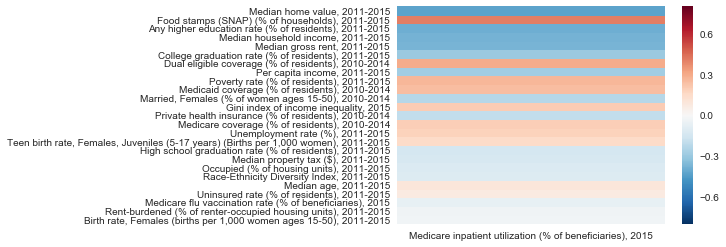

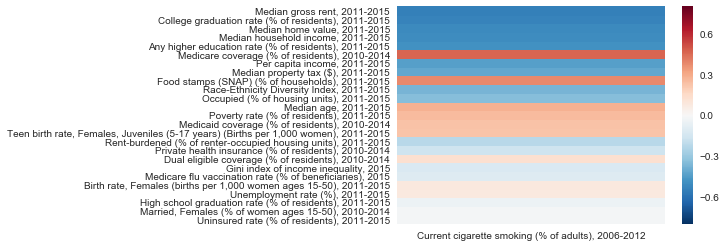

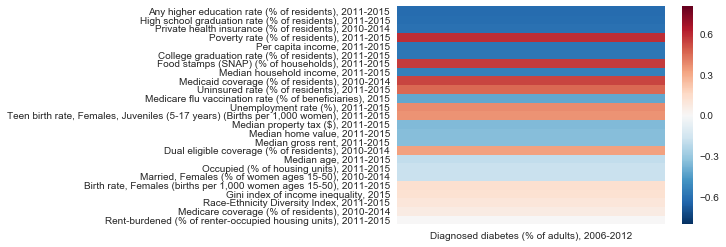

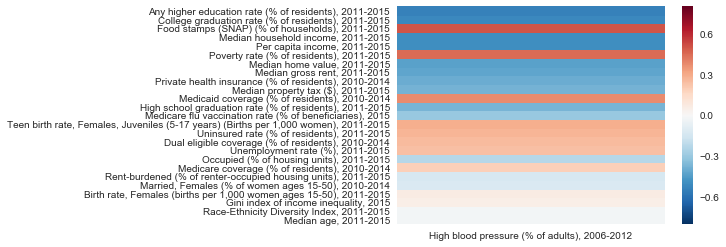

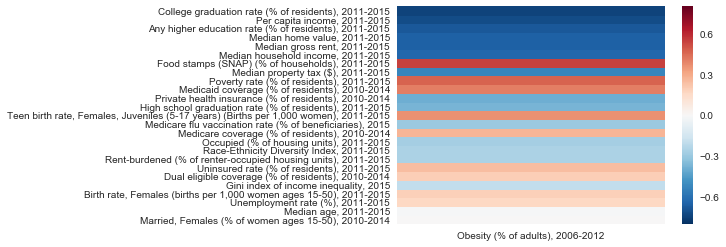

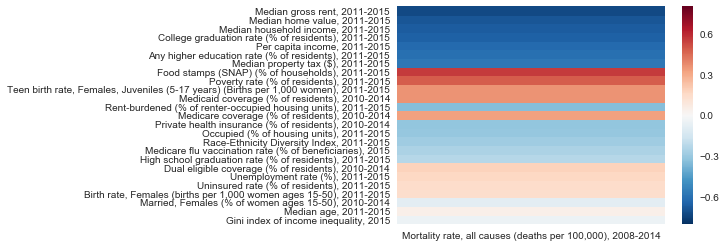

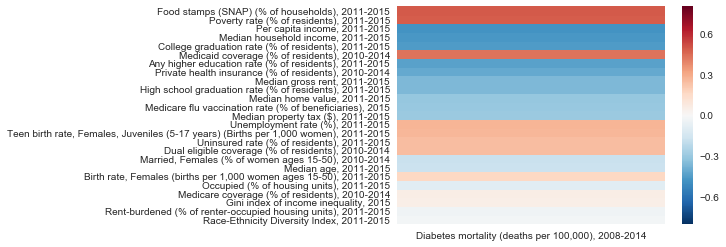

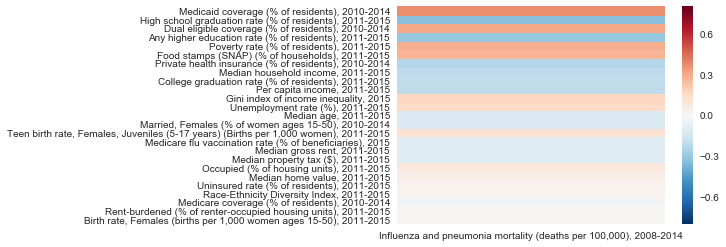

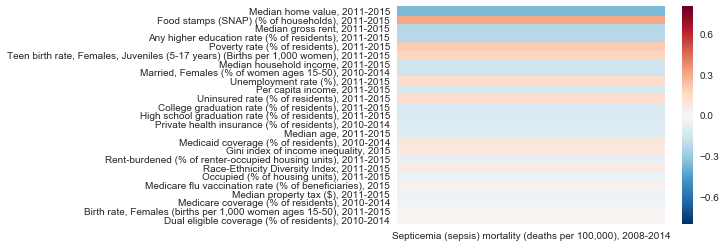

In [171]:
for y in ys:
    ordered_heatmap(ordered_corrs(xs,ys[y], w))


In [186]:
from sklearn import linear_model
import statsmodels.formula.api as smf

In [234]:
def drop_nan(X,y, sample_weight=None, drop_threshold = .1, verbose = False):
    '''
    
    drop_threshold: float (between 0 and 1)
        When the proportion of nans in a column is above threshold, drop the column
    '''
    
    # Drop all data without an outcome measure
    valid_y = np.isfinite(y) 
    if verbose:
        dropped = valid_y.count() - valid_y.sum()
        print("Dropped {} rows with nan in outcome variable y\n".format(dropped))
    X = X[valid_y]
    y = y[valid_y]
    
    
    # Drop columns where the proportion of nans is above the drop_threshold
    drop_columns = X.isnull().sum() / X.shape[0] > drop_threshold
    if verbose:
        dropped = X.columns[drop_columns]
        message = "Dropped columns: "
        for d in dropped:
            message += d + "\n"
        print(message)      
    passable_columns = X.columns[~drop_columns]
    X = X[passable_columns]
    
    
    # Drop rows where we find NaNs in the Xs.
    xmask = np.isfinite(X)
    valid_X = xmask.all(axis=1)
    if verbose:
        dropped = valid_X.count() - valid_X.sum()
        print("Dropped {} rows with nans in X".format(dropped))
    X = X[valid_X]
    y = y[valid_X]
    
    if sample_weight is not None:
        sample_weight = sample_weight[valid_y][valid_X]
        return X, y, sample_weight
    
    return X, y

In [236]:
X = xs

for n in range(ys.shape[1]):
    y = ys.ix[:,n]
    a,b,wgt = drop_nan(X,y, sample_weight=w)
    lm = linear_model.LinearRegression()
    model = lm.fit(a,b, sample_weight=wgt)
    score = lm.score(a,b, sample_weight=wgt)
    print("R^2 for {var}: {score}".format(var=ys.columns[n], score=score))

R^2 for Medicare Advantage participation rate (% of beneficiaries), 2015: 0.3380013367948229
R^2 for Medicare FFS per capita costs ($ per beneficiary), 2015: 0.4247662599527655
R^2 for Medicare emergency department visit rate (visits per 1,000 beneficiaries), 2015: 0.5171099571249675
R^2 for Readmission rate (Medicare) (% of hospital admissions), 2015: 0.5204302200519908
R^2 for Medicare inpatient utilization (% of beneficiaries), 2015: 0.49440597153706556
R^2 for Current cigarette smoking (% of adults), 2006-2012: 0.5051156558349555
R^2 for Diagnosed diabetes (% of adults), 2006-2012: 0.5472113943781349
R^2 for High blood pressure (% of adults), 2006-2012: 0.4331023473267152
R^2 for Obesity (% of adults), 2006-2012: 0.6693548463907344
R^2 for Mortality rate, all causes (deaths per 100,000), 2008-2014: 0.719234900431534
R^2 for Diabetes mortality (deaths per 100,000), 2008-2014: 0.3486038127784017
R^2 for Influenza and pneumonia mortality (deaths per 100,000), 2008-2014: 0.283853524900

In [201]:
coef= pd.DataFrame(model.coef_, index = a.columns, columns = [b.name])
coef.sort_values(b.name)

,"Septicemia (sepsis) mortality (deaths per 100,000), 2008-2014"
"Any higher education rate (% of residents), 2011-2015",-0.230955
"Uninsured rate (% of residents), 2011-2015",-0.208737
"Medicaid coverage (% of residents), 2010-2014",-0.194280
"Median age, 2011-2015",-0.124511
"High school graduation rate (% of residents), 2011-2015",-0.098918
"Dual eligible coverage (% of residents), 2010-2014",-0.091794
"Married, Females (% of women ages 15-50), 2010-2014",-0.079556
"Private health insurance (% of residents), 2010-2014",-0.073127
"Poverty rate (% of residents), 2011-2015",-0.027564
"Birth rate, Females (births per 1,000 women ages 15-50), 2011-2015",-0.024144


In [161]:
def ols(X,y, drop_threshold = .1, verbose = False):
    X,y = drop_nan(X,y, verbose=True)
    lm = linear_model.LinearRegression()
    model = lm.fit(X,y)
    coef= pd.DataFrame(model.coef_, index = a.columns, columns = [b.name])
    return coef.sort_values(b.name)

# next steps do we 

'Medicare FFS per capita costs ($ per beneficiary), 2015'

In [210]:
a = np.array([[1,1,1,0,0,0],[0,0,0,1,1,1]]).T
b = np.array([.3, .4, .8, .1, .2, .4])



In [211]:
lm = linear_model.LinearRegression()
model = lm.fit(a,b)

In [308]:
import statsmodels.api as sm
df = pd.read_csv('HealthViz County Dataset 6 21 17.csv',header=1,skiprows=0, index_col=0, encoding='latin-1')
df.index.name=None

In [398]:
weights = df['Population (residents), 2011-2015']

y = df['Diabetes mortality (deaths per 100,000), 2008-2014']

#var = ['Election margin, winner (Presidential) (% margin), 2016']
controls = ['Population, Non-Hispanic Black (residents), 2011-2015',
'Population, Hispanic or Latino (residents), 2011-2015',
'Population, Asian or Pacific Islander (residents), 2011-2015',
'Median age, 2011-2015',
'Median household income, 2011-2015',
'Poverty rate (% of residents), 2011-2015',
'Share of income, top 5% (% of total income), 2011-2015',
'Dual eligible coverage (% of residents), 2010-2014',
'College graduation rate (% of residents), 2011-2015',
'Graduate education rate (% of residents), 2011-2015',
'Food stamps (SNAP) (% of households), 2011-2015']


#X = df[var + controls]

data_var = 'Readmission rate (Medicare) (% of hospital admissions), 2015'
X = pd.merge(pd.DataFrame(data[data_var]), df[controls],right_index=True, left_index=True )

X,y,w = drop_nan(X,y, weights, verbose = True)

Dropped 737 rows with nan in outcome variable y

Dropped columns: 
Dropped 1 rows with nans in X


In [485]:
data

,Unnamed: 1,"Population (residents), 2011-2015","Median household income, 2011-2015","Per capita income, 2011-2015","Gini index of income inequality, 2015","Food stamps (SNAP) (% of households), 2011-2015","Poverty rate (% of residents), 2011-2015","Median property tax ($), 2011-2015","Rent-burdened (% of renter-occupied housing units), 2011-2015","Median gross rent, 2011-2015",...,"Medicare inpatient utilization (% of beneficiaries), 2015","Current cigarette smoking (% of adults), 2006-2012","Diagnosed diabetes (% of adults), 2006-2012","High blood pressure (% of adults), 2006-2012","Obesity (% of adults), 2006-2012","Mortality rate, all causes (deaths per 100,000), 2008-2014","Diabetes mortality (deaths per 100,000), 2008-2014","Influenza and pneumonia mortality (deaths per 100,000), 2008-2014","Septicemia (sepsis) mortality (deaths per 100,000), 2008-2014","Years of potential life lost (YPLL) (life-years lost per 100,000), 2012-2014"
1001,"Autauga County, AL",55221,51219.97561,24974.00000,NaN,13.777211,12.879382,455.00000,49.407783,881.94923,...,18.20,21.0,10.8,27.3,29.2,917.2,21.5,17.7,19.1,9158.2
1003,"Baldwin County, AL",195121,50194.19774,27317.00000,0.4722,9.003563,13.411661,573.00000,44.544464,877.95399,...,16.23,22.7,7.5,30.9,25.0,792.7,17.5,10.5,10.0,7393.9
1005,"Barbour County, AL",26932,32924.77284,16824.00000,NaN,25.970505,26.727439,301.00000,40.946992,578.31099,...,17.60,25.2,11.3,46.4,46.1,914.3,19.4,12.0,12.7,8573.1
1007,"Bibb County, AL",22604,38631.97318,18431.00000,NaN,15.781984,16.795878,266.00000,35.162950,650.22531,...,17.81,25.6,9.2,39.1,30.5,1029.3,24.5,17.0,20.1,11766.1
1009,"Blount County, AL",57710,45758.48253,20532.00000,NaN,13.489623,16.720933,419.00000,31.117687,600.28481,...,15.98,22.4,8.6,36.2,34.4,907.0,13.8,32.4,20.8,9332.8
1011,"Bullock County, AL",10678,31899.99378,17580.00000,NaN,23.133315,24.618736,270.00000,38.361266,569.32170,...,18.84,40.1,14.2,25.8,42.0,948.1,56.0,0.0,25.0,10857.7
1013,"Butler County, AL",20354,32190.64749,18390.00000,NaN,23.460775,25.364736,311.00000,43.573798,574.31575,...,19.87,32.8,10.1,31.5,35.4,991.2,44.6,15.3,17.8,12427.4
1015,"Calhoun County, AL",116648,41653.37343,21374.00000,0.4219,20.263985,20.532209,442.00000,45.252236,636.24197,...,20.32,25.6,13.2,36.2,33.4,1040.1,13.5,34.4,30.2,10716.9
1017,"Chambers County, AL",34079,34136.32937,21071.00000,NaN,16.754914,21.589931,344.00000,45.424032,657.21698,...,17.84,25.3,17.3,44.7,44.5,1018.8,47.8,18.1,18.1,11410.4
1019,"Cherokee County, AL",26008,36252.80776,21811.00000,NaN,18.540521,19.229717,432.00000,41.517680,620.26101,...,19.28,27.8,14.1,43.6,34.7,1002.5,15.7,29.7,13.9,12533.9


In [399]:
X_1 = sm.add_constant(X)
model = sm.OLS(y,X_1)
model2 = sm.WLS(y,X_1,weights=w)
model.fit().summary()
#model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                            
==============================================================================================================
Dep. Variable:     Diabetes mortality (deaths per 100,000), 2008-2014   R-squared:                       0.307
Model:                                                            OLS   Adj. R-squared:                  0.304
Method:                                                 Least Squares   F-statistic:                     91.14
Date:                                                Wed, 21 Jun 2017   Prob (F-statistic):          1.69e-186
Time:                                                        14:06:31   Log-Likelihood:                -8991.7
No. Observations:                                                2482   AIC:                         1.801e+04
Df Residuals:                                                    2469   BIC:                         1.809e+04
Df Model:                                                          12                                         
Covariance Type:                                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           25.5948      4.001      6.398      0.000      17.750      33.440
Readmission rate (Medicare) (% of hospital admissions), 2015     0.0546      0.078      0.702      0.483      -0.098       0.207
Population, Non-Hispanic Black (residents), 2011-2015        -3.145e-06   4.02e-06     -0.782      0.434    -1.1e-05    4.74e-06
Population, Hispanic or Latino (residents), 2011-2015        -6.468e-06   2.42e-06     -2.678      0.007   -1.12e-05   -1.73e-06
Population, Asian or Pacific Islander (residents), 2011-2015  1.487e-05   7.34e-06      2.026      0.043     4.8e-07    2.93e-05
Median age, 2011-2015                                           -0.3474      0.048     -7.273      0.000      -0.441      -0.254
Median household income, 2011-2015                            6.531e-05   3.54e-05      1.847      0.065   -4.02e-06       0.000
Poverty rate (% of residents), 2011-2015                         0.3489      0.073      4.783      0.000       0.206       0.492
Share of income, top 5% (% of total income), 2011-2015           0.2673      0.081      3.315      0.001       0.109       0.425
Dual eligible coverage (% of residents), 2010-2014              -0.0575      0.189     -0.303      0.762      -0.429       0.314
College graduation rate (% of residents), 2011-2015             -0.0353      0.078     -0.451      0.652      -0.189       0.118
Graduate education rate (% of residents), 2011-2015             -0.7773      0.149     -5.219      0.000      -1.069      -0.485
Food stamps (SNAP) (% of households), 2011-2015                  0.3645      0.061      5.991      0.000       0.245       0.484
==============================================================================
Omnibus:                      982.100   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6933.434
Skew:                           1.704   Prob(JB):                         0.00
Kurtosis:                      10.445   Cond. No.                     3.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong mul

In [421]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y, sample_weight=1/w)
#model = lm.fit(X,y)
model.score(X,y)
beta = pd.Series(model.coef_)
beta.index = X.columns
#model.intercept_
beta

Readmission rate (Medicare) (% of hospital admissions), 2015   -0.081213
Population, Non-Hispanic Black (residents), 2011-2015          -0.000027
Population, Hispanic or Latino (residents), 2011-2015          -0.000054
Population, Asian or Pacific Islander (residents), 2011-2015    0.000084
Median age, 2011-2015                                          -0.460610
Median household income, 2011-2015                             -0.000003
Poverty rate (% of residents), 2011-2015                        0.458509
Share of income, top 5% (% of total income), 2011-2015          0.451952
Dual eligible coverage (% of residents), 2010-2014             -0.622978
College graduation rate (% of residents), 2011-2015             0.481268
Graduate education rate (% of residents), 2011-2015            -2.030380
Food stamps (SNAP) (% of households), 2011-2015                 0.363899
dtype: float64

In [422]:
model.score(X,y, sample_weight=(1/w))

0.28710798793826342

In [423]:
model.intercept_

32.390974070954627

In [481]:
model = sm.WLS(y,X_1, 1/w)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            WLS Regression Results                                            
==============================================================================================================
Dep. Variable:     Diabetes mortality (deaths per 100,000), 2008-2014   R-squared:                       0.287
Model:                                                            WLS   Adj. R-squared:                  0.284
Method:                                                 Least Squares   F-statistic:                     82.86
Date:                                                Wed, 21 Jun 2017   Prob (F-statistic):          1.72e-171
Time:                                                        14:48:30   Log-Likelihood:                -10122.
No. Observations:                                                2482   AIC:                         2.027e+04
Df Residuals:                                                    2469   BIC:                         2.035e+04
Df Model:                                                          12                                         
Covariance Type:                                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           32.3910      5.033      6.435      0.000      22.521      42.261
Readmission rate (Medicare) (% of hospital admissions), 2015    -0.0812      0.077     -1.053      0.293      -0.232       0.070
Population, Non-Hispanic Black (residents), 2011-2015        -2.712e-05   2.54e-05     -1.066      0.287    -7.7e-05    2.28e-05
Population, Hispanic or Latino (residents), 2011-2015        -5.427e-05   2.08e-05     -2.611      0.009    -9.5e-05   -1.35e-05
Population, Asian or Pacific Islander (residents), 2011-2015  8.374e-05   6.14e-05      1.363      0.173   -3.67e-05       0.000
Median age, 2011-2015                                           -0.4606      0.055     -8.306      0.000      -0.569      -0.352
Median household income, 2011-2015                           -3.158e-06   4.84e-05     -0.065      0.948    -9.8e-05    9.17e-05
Poverty rate (% of residents), 2011-2015                         0.4585      0.076      6.009      0.000       0.309       0.608
Share of income, top 5% (% of total income), 2011-2015           0.4520      0.078      5.794      0.000       0.299       0.605
Dual eligible coverage (% of residents), 2010-2014              -0.6230      0.196     -3.184      0.001      -1.007      -0.239
College graduation rate (% of residents), 2011-2015              0.4813      0.094      5.116      0.000       0.297       0.666
Graduate education rate (% of residents), 2011-2015             -2.0304      0.183    -11.086      0.000      -2.390      -1.671
Food stamps (SNAP) (% of households), 2011-2015                  0.3639      0.064      5.674      0.000       0.238       0.490
==============================================================================
Omnibus:                     1536.171   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30278.924
Skew:                           2.569   Prob(JB):                         0.00
Kurtosis:                      19.321   Cond. No.                     1.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong mul

In [483]:
results = model.fit()
betas = results.params.ix['Readmission rate (Medicare) (% of hospital admissions), 2015'])
hetero_se = results.HC0_se.ix['Readmission rate (Medicare) (% of hospital admissions), 2015']

-0.0812129714727
0.156091448611


0.077136153430985455

In [364]:
model = lm.fit(X,y, sample_weight=w)
model.score(X,y)
model.coef_
model.intercept_

32.410841134194328

In [363]:
X_1 = sm.add_constant(X)
model = sm.WLS(y,X_1,1/w)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            WLS Regression Results                                            
==============================================================================================================
Dep. Variable:     Diabetes mortality (deaths per 100,000), 2008-2014   R-squared:                       0.288
Model:                                                            WLS   Adj. R-squared:                  0.285
Method:                                                 Least Squares   F-statistic:                     83.23
Date:                                                Wed, 21 Jun 2017   Prob (F-statistic):          3.71e-172
Time:                                                        11:50:02   Log-Likelihood:                -10121.
No. Observations:                                                2482   AIC:                         2.027e+04
Df Residuals:                                                    2469   BIC:                         2.034e+04
Df Model:                                                          12                                         
Covariance Type:                                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           28.4730      5.048      5.641      0.000      18.575      38.371
Election margin, winner (Presidential) (% margin), 2016          0.0253      0.012      2.053      0.040       0.001       0.049
Population, Non-Hispanic Black (residents), 2011-2015        -2.438e-05   2.54e-05     -0.959      0.338   -7.43e-05    2.55e-05
Population, Hispanic or Latino (residents), 2011-2015        -5.378e-05   2.08e-05     -2.589      0.010   -9.45e-05    -1.3e-05
Population, Asian or Pacific Islander (residents), 2011-2015  7.723e-05   6.15e-05      1.256      0.209   -4.33e-05       0.000
Median age, 2011-2015                                           -0.4574      0.055     -8.253      0.000      -0.566      -0.349
Median household income, 2011-2015                             6.37e-06   4.86e-05      0.131      0.896    -8.9e-05       0.000
Poverty rate (% of residents), 2011-2015                         0.4642      0.076      6.082      0.000       0.315       0.614
Share of income, top 5% (% of total income), 2011-2015           0.4538      0.078      5.821      0.000       0.301       0.607
Dual eligible coverage (% of residents), 2010-2014              -0.6087      0.196     -3.111      0.002      -0.992      -0.225
College graduation rate (% of residents), 2011-2015              0.5325      0.091      5.826      0.000       0.353       0.712
Graduate education rate (% of residents), 2011-2015             -2.0804      0.178    -11.708      0.000      -2.429      -1.732
Food stamps (SNAP) (% of households), 2011-2015                  0.3779      0.065      5.852      0.000       0.251       0.505
==============================================================================
Omnibus:                     1549.409   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31422.179
Skew:                           2.590   Prob(JB):                         0.00
Kurtosis:                      19.643   Cond. No.                     1.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong mul